<a href="https://colab.research.google.com/github/why00n/card/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#  for filename in filenames:
#    print(os.path.join(dirname, filename))
path='/content/drive/MyDrive/kaggle/spotify dataset(1992_2021)'

In [ ]:
data = pd.read_csv(path+'/data_o.csv')
genre_dt = pd.read_csv(path+'/data_by_genres_o.csv')
year_dt = pd.read_csv(path+'/data_by_year_o.csv')
artist_dt=pd.read_csv(path+'/data_by_artist_o.csv')
tracks_dt=pd.read_csv(path+'/tracks.csv')

In [ ]:
genre_dt.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
data.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

<Figure size 1152x576 with 0 Axes>

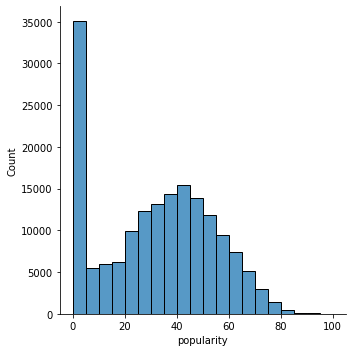

In [ ]:
plt.figure(figsize=(16,8))
sns.displot(data['popularity'], bins=20)

<Figure size 1152x576 with 0 Axes>

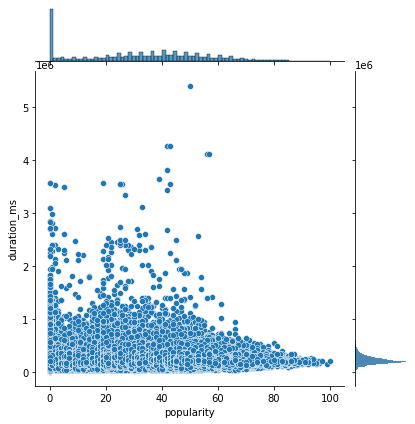

In [ ]:
# 인기도와 트랙지속시간 간의 상관관계 
plt.figure(figsize=(16,8))
ax=sns.jointplot(x=data['popularity'], y=data['duration_ms'],data=data)

In [ ]:
data['duration_min']=data['duration_ms']/60000 # 시간단위 (분)으로 변환

In [ ]:
# 지속시간이 가장 긴 것 추출
data[data['duration_ms']==data['duration_ms'].max()]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
107341,0.0,2013,0.111,['Sound Dreamer'],0.0,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0,0.0,90.058333


In [ ]:
data[data['popularity']>95]['name']

19606             Mood (feat. iann dior)
19608    WAP (feat. Megan Thee Stallion)
19610                          positions
19611                             Dakiti
19612            What You Know Bout Love
19616                    Blinding Lights
19618                           Dynamite
Name: name, dtype: object

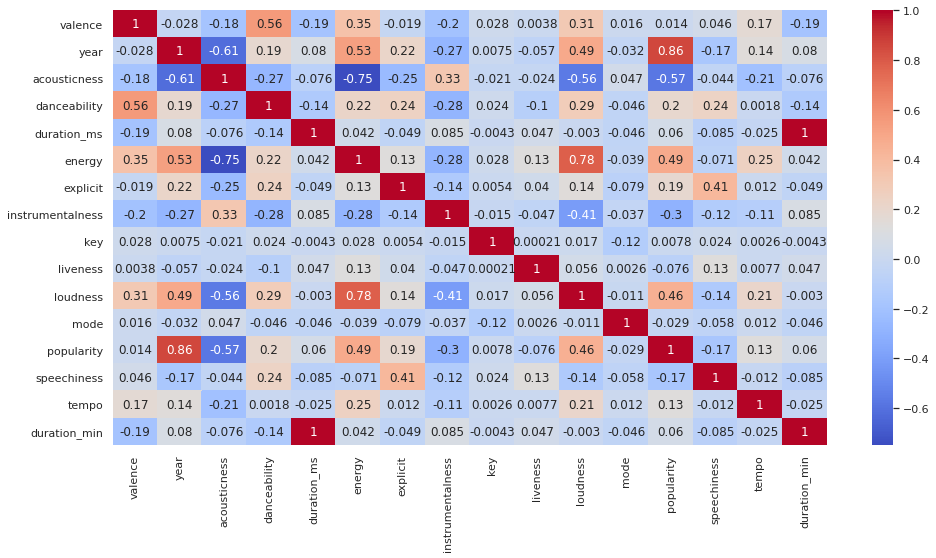

In [ ]:
plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
corr=data.corr()
sns.heatmap(corr,annot=True, cmap='coolwarm')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

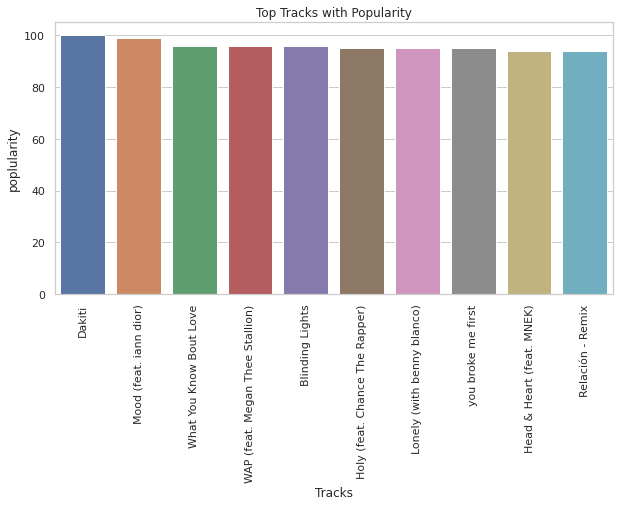

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
x=data.groupby('name')['popularity'].mean().sort_values(ascending=False).head(10)
ax=sns.barplot(x.index, x)
ax.set_title('Top Tracks with Popularity')
ax.set_ylabel('poplularity')
ax.set_xlabel('Tracks')
plt.xticks(rotation=90)

In [ ]:
data[data['artists']=="['BTS']"]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
19618,0.737,2020,0.01120,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044,3.317567
19666,0.450,2020,0.00691,['BTS'],0.566,207481,0.716,0,249gnXrbfmV8NG6jTEMSwD,0.000000,1,0.3700,-5.733,1,Life Goes On,90,2020-11-20,0.0424,81.068,3.458017
19775,0.364,2020,0.42000,['BTS'],0.547,254950,0.605,0,0n2moJpAEWHwaPYYjkzMDl,0.000000,8,0.1250,-6.755,1,Blue & Grey,84,2020-11-20,0.0415,121.953,4.249167
19787,0.588,2020,0.04840,['BTS'],0.764,222243,0.526,0,3QH8rQGNFX8VLbCgZ7uPTS,0.000000,11,0.0718,-7.355,1,Fly To My Room,84,2020-11-20,0.2120,114.910,3.704050
19794,0.570,2020,0.00782,['BTS'],0.787,202313,0.669,0,2FVpOsjT1iquZ3SpCjZ9Ne,0.000000,5,0.1230,-4.333,0,Telepathy,84,2020-11-20,0.0428,104.994,3.371883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169854,0.541,2017,0.00912,['BTS'],0.667,238193,0.889,0,2SYa5Lx1uoCvyDIW4oee9b,0.000000,6,0.0816,-4.851,1,MIC Drop,64,2017-09-18,0.0918,169.959,3.969883
169857,0.473,2017,0.02980,['BTS'],0.651,227191,0.756,0,2tdq0CeAGSfhI2l4Gwkvgx,0.000000,8,0.3960,-4.388,1,Best Of Me,64,2017-09-18,0.0762,121.960,3.786517
170062,0.866,2018,0.02680,['BTS'],0.769,218615,0.817,0,1trFxVLL8WKhYap543e74l,0.000100,0,0.0840,-4.092,0,Airplane pt.2,66,2018-05-18,0.0339,139.979,3.643583
170120,0.467,2018,0.32700,['BTS'],0.711,284981,0.903,0,6L1rxT6NUotot2AAiLXGLj,0.000000,6,0.0887,-2.723,0,Tear,67,2018-08-24,0.2470,140.015,4.749683


# **Time Analysis**

Text(0.5, 0, 'Year')

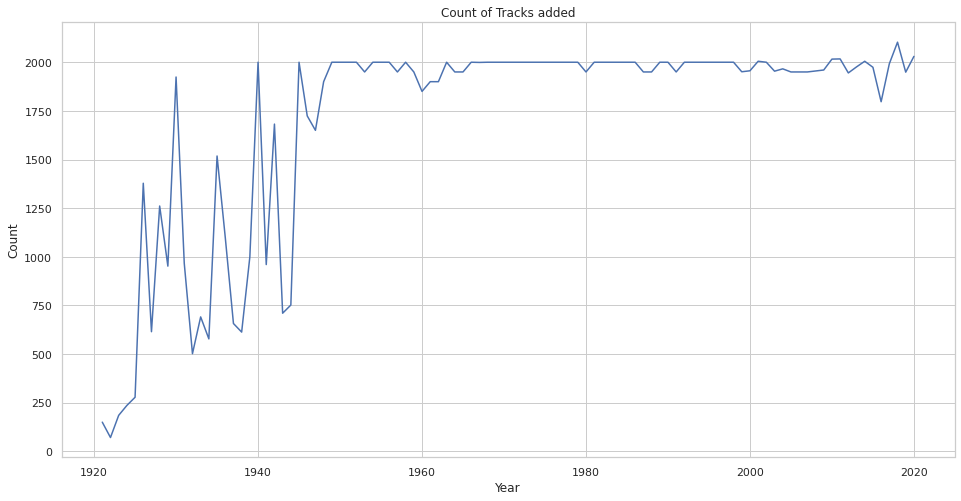

In [ ]:
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')
x=data.groupby('year')['id'].count()
ax=sns.lineplot(x.index, x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

Text(0, 0.5, 'Measure')

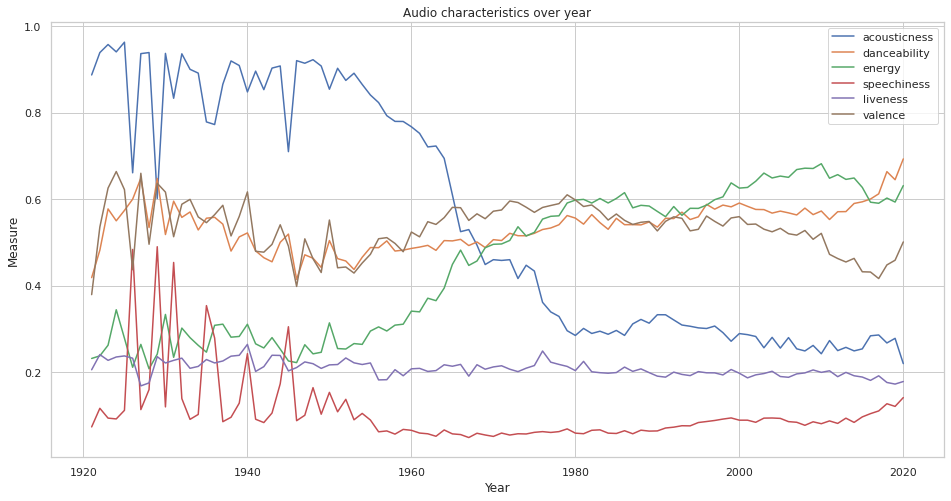

In [ ]:
# 추이 
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')
columns=['acousticness','danceability','energy','speechiness','liveness','valence']
for col in columns:
  x=data.groupby('year')[col].mean()
  ax=sns.lineplot(x=x.index, y=x, label=col)
ax.set_title('Audio characteristics over year')
ax.set_xlabel('Year')
ax.set_ylabel('Measure')

Text(0, 0.5, 'Count')

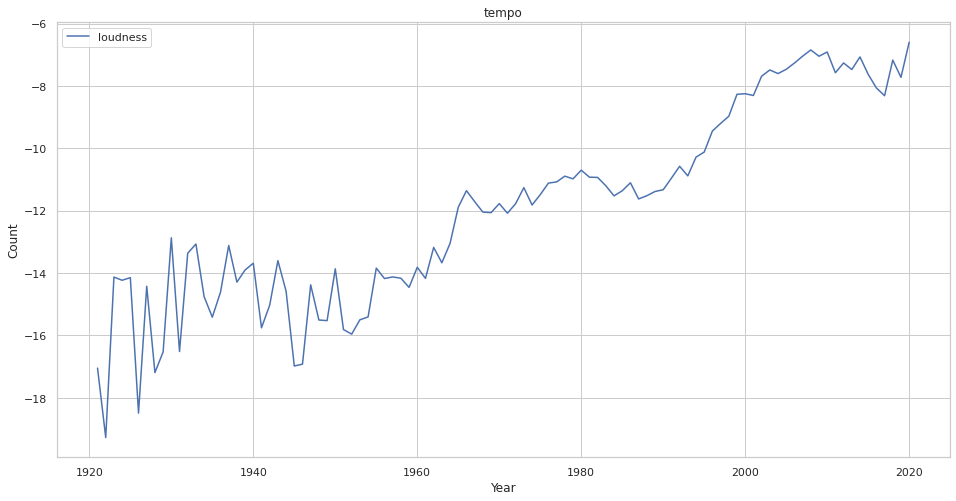

In [ ]:
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')
columns=['loudness']
for col in columns:
  x=data.groupby('year')[col].mean()
  ax=sns.lineplot(x=x.index, y=x, label=col)
ax.set_title('tempo')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

Text(0.5, 0, 'Year')

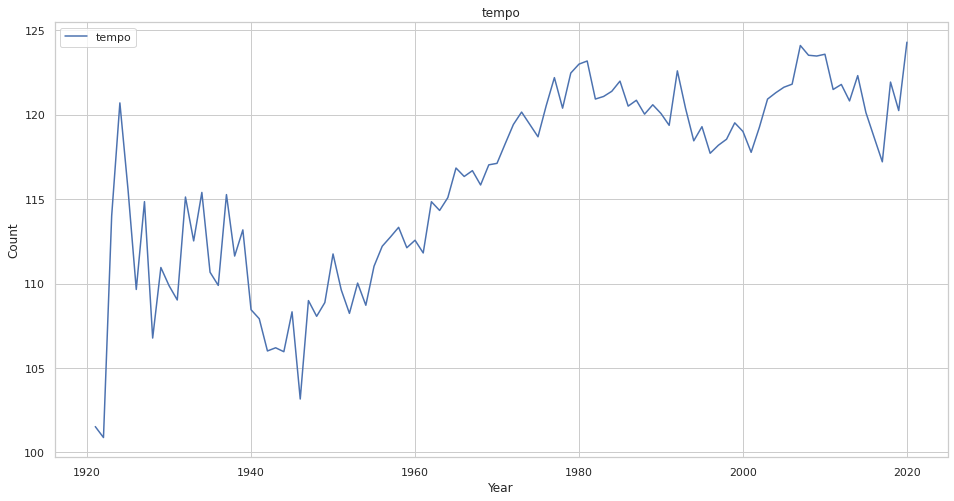

In [ ]:
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')

#columns=["tempo"]
#for col in columns:

# 년도별 평균 템포  -- 템포가 점점 높아지는 경향
x=data.groupby('year')['tempo'].mean()
ax=sns.lineplot(x=x.index, y=x, label='tempo')

ax.set_title('tempo')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

In [ ]:
# 1s = 1000 ms 
# 1year = 60s * 60m * 24 * 365 
data.duration_ms.sum()/(1000*60*60*24*365) 

1.249747021182141

In [ ]:
# 년도별 재생시간 평균
data.groupby('year')['duration_ms'].mean()/(1000*60)


# 연습용 - 위랑 아래랑 결과 같음 
#year_nunique=data['year'].value_counts().sort_index()
#data.groupby('year')['duration_ms'].sum()/(1000*60*year_nunique)

year
1921    4.342286
1922    2.757829
1923    2.965706
1924    3.184112
1925    3.083115
          ...   
2016    3.689942
2017    3.518595
2018    3.433350
2019    3.350413
2020    3.228807
Name: duration_ms, Length: 100, dtype: float64

<Figure size 1152x576 with 0 Axes>

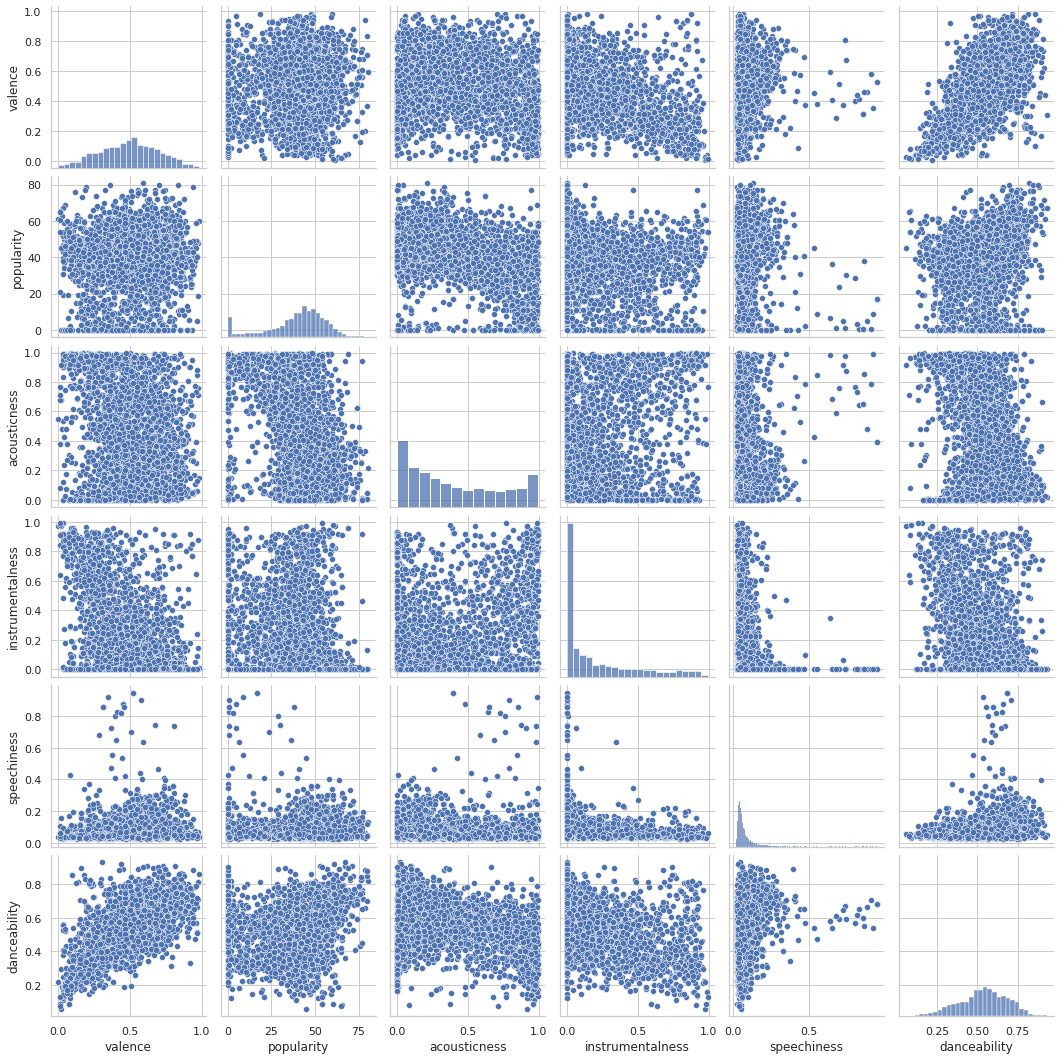

In [ ]:
# 
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')
cols=['valence', 'popularity', 'acousticness', 'instrumentalness', 'speechiness', 'danceability']
sns.pairplot(genre_dt[cols], height=2.5)
plt.show()

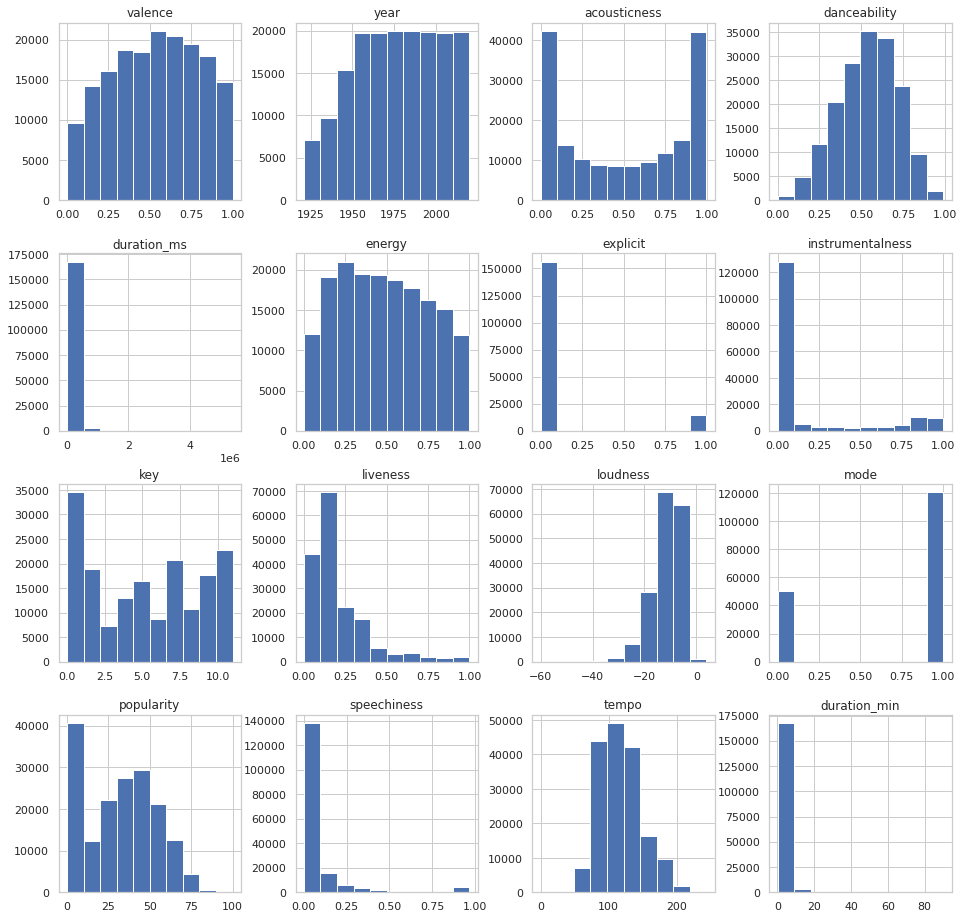

In [ ]:
data.hist(figsize=(16,16))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

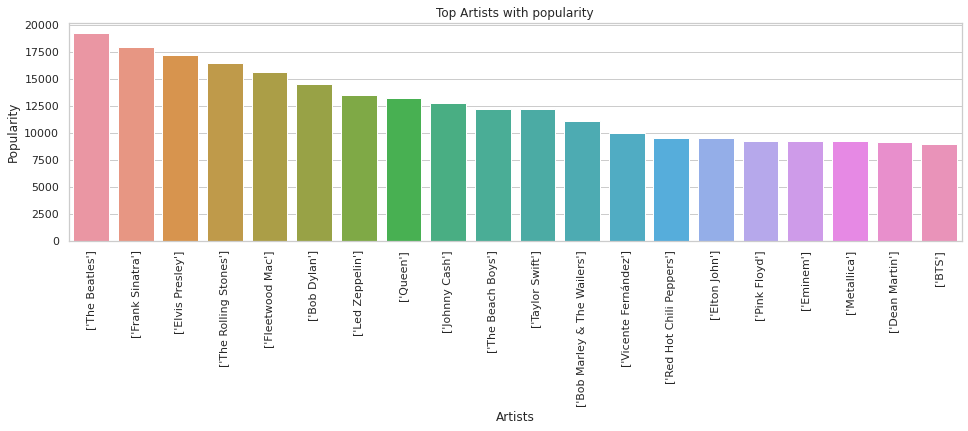

In [ ]:
plt.figure(figsize=(16,4))
sns.set(style="whitegrid")
x=data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax=sns.barplot(x.index, x)
ax.set_title("Top Artists with popularity")
ax.set_ylabel("Popularity")
ax.set_xlabel("Artists")
plt.xticks(rotation=90)

In [ ]:
data[data['artists'].str.contains('PSY')]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
18201,0.749,2012,0.00417,['PSY'],0.727,219493,0.937,0,03UrZgTINDqvnUMbbIMhql,0.0,11,0.091,-2.871,0,Gangnam Style (강남스타일),71,2012-01-01,0.286,132.067,3.658217


In [ ]:
bts=data[data['artists'].str.contains("BTS")]
bts.sort_values(by=['popularity'],ascending=False)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,duration_min
19618,0.737,2020,0.01120,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.0,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044,3.317567
19666,0.450,2020,0.00691,['BTS'],0.566,207481,0.716,0,249gnXrbfmV8NG6jTEMSwD,0.0,1,0.3700,-5.733,1,Life Goes On,90,2020-11-20,0.0424,81.068,3.458017
57226,0.658,2020,0.16000,"['Jawsh 685', 'Jason Derulo', 'BTS']",0.758,184905,0.598,1,4TgxFMOn5yoESW6zCidCXL,0.0,0,0.2950,-5.695,0,Savage Love (Laxed – Siren Beat) [BTS Remix],86,2020-10-02,0.0868,149.836,3.081750
19554,0.798,2019,0.09230,"['BTS', 'Halsey']",0.645,229773,0.862,0,5KawlOMHjWeUjQtnuRs22c,0.0,11,0.1920,-4.757,0,Boy With Luv (feat. Halsey),84,2019-04-12,0.0965,119.991,3.829550
19775,0.364,2020,0.42000,['BTS'],0.547,254950,0.605,0,0n2moJpAEWHwaPYYjkzMDl,0.0,8,0.1250,-6.755,1,Blue & Grey,84,2020-11-20,0.0415,121.953,4.249167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169282,0.537,2014,0.06980,['BTS'],0.634,172658,0.814,0,5viiEUG6TwSmDPXX1hHo0X,0.0,1,0.1460,-4.325,1,Outro: Do You Think It Makes Sense?,54,2014-08-20,0.0406,103.041,2.877633
169397,0.514,2014,0.46700,['BTS'],0.398,122514,0.847,0,2M2LSar3DJWLQHcp1MZETj,0.0,2,0.2050,-2.489,1,Outro: Propose,54,2014-02-12,0.1590,173.733,2.041900
154184,0.473,2013,0.05080,['BTS'],0.693,86045,0.392,0,5kD6DnMehM1XD8dvS83Xzu,0.0,5,0.1440,-6.615,1,Outro: Luv in Skool,54,2013-09-11,0.0439,131.863,1.434083
169417,0.861,2014,0.47800,['BTS'],0.684,235467,0.717,0,5ajpyr32JgFtvW0nzvgva4,0.0,11,0.3670,-5.765,0,Iine!Pt.2 - Ano Bashode -,53,2014-12-24,0.1510,95.039,3.924450


In [ ]:
bts_top10=bts.sort_values(by=['popularity'],ascending=False).head(10)
bts_top10.mean()

valence                  0.542800
year                  2019.900000
acousticness             0.099183
danceability             0.670900
duration_ms         219162.200000
energy                   0.709600
explicit                 0.100000
instrumentalness         0.000000
key                      6.500000
liveness                 0.181660
loudness                -5.458400
mode                     0.500000
popularity              85.700000
speechiness              0.089850
tempo                  113.972100
duration_min             3.652703
dtype: float64

In [ ]:
data[data['year']==['2019','2020','2021']] 
data['tempo'].mean 

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [ ]:
year_19_21=['2019','2020','2021']
data[data['year'].isin(year_19_21)]['tempo'].mean()

122.30058356370918